In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import ast
from mgua import *
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import random as rnd
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor


In [2]:

# БЕЗ ВКЛЮЧЕННЫХ МАРКЕРОВ

In [6]:
tab1 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo2chains.csv")
tab2 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo3chains.csv")
tab3 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo4chains.csv")
tab4 = pd.read_csv("data_varvara/cox2/cox2_matrix_alphabet_NN***_UpTo5chains.csv")

tab1.shape, tab2.shape, tab3.shape, tab4.shape

((467, 11), (467, 29), (467, 53), (467, 89))

In [7]:
tab1["key"] = [i for i in range(tab1.shape[0])]
tab2["key"] = [i for i in range(tab2.shape[0])]
tab3["key"] = [i for i in range(tab3.shape[0])]
tab4["key"] = [i for i in range(tab4.shape[0])]

In [8]:
tab = pd.merge(tab1, tab2, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab3, left_on="key", right_on="key", how="inner")
tab = pd.merge(tab, tab4, left_on="key", right_on="key", how="inner")

In [9]:
for i in tab.keys():
    print(i+"; ",end="")

Br***C***; C***C***; C***Cl***; C***F***; C***N***; C***O***; C***S***; N***N***; N***O***; N***S***; O***S***; key; Br***C***C***; Br***C***S***; C***C***C***; C***C***Cl***; C***C***F***; C***C***N***; C***C***O***; C***C***S***; C***N***C***; C***N***N***; C***N***O***; C***N***S***; C***O***C***; C***O***N***; C***S***C***; C***S***N***; C***S***O***; Cl***C***S***; F***C***F***; F***C***O***; F***C***S***; N***C***N***; N***C***O***; N***C***S***; N***S***O***; O***C***O***; O***C***S***; O***N***O***; O***S***O***; Br***C***C***C***; Br***C***C***N***; Br***C***C***O***; Br***C***C***S***; Br***C***S***C***; C***C***C***C***; C***C***C***Cl***; C***C***C***F***; C***C***C***N***; C***C***C***O***; C***C***C***S***; C***C***N***C***; C***C***N***N***; C***C***N***O***; C***C***N***S***; C***C***O***C***; C***C***O***N***; C***C***S***C***; C***C***S***N***; C***C***S***O***; C***N***C***N***; C***N***C***O***; C***N***C***S***; C***N***N***C***; C***N***O***C***; C***N***S***C***;

In [10]:
tab = tab.drop("key",axis=1)
tab.shape

(467, 182)

In [11]:
tab.head()

,Br***C***,C***C***,C***Cl***,C***F***,C***N***,C***O***,C***S***,N***N***,N***O***,N***S***,...,N***C***C***C***O***,N***C***C***C***S***,N***C***C***N***N***,N***C***C***N***O***,N***C***C***O***N***,N***C***C***S***O***,N***N***C***C***O***,N***N***C***C***S***,N***O***C***C***O***,S***C***C***C***S***
0,0.0,17.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,16.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,16.0,0.0,1.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,17.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,18.0,0.0,3.0,3.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
y = pd.read_csv("data_varvara/cox2/cox2_y.csv")

In [13]:
y = np.array(y)

In [14]:
r = []
for i in y:
    s = i[0]
    s = re.sub('inf', '1_000_000_000', str(s))
    r.append(ast.literal_eval(s))

In [15]:
y = np.array(r)
for i in range(y.shape[0]):
    if y[i,1] == 1_000_000_000:
        y[i,1] = np.inf

In [16]:
X = np.array(tab)

In [220]:
mdl = LinearRegression(normalize=True)

In [358]:
ans = []
ind = 0
for train_index, test_index in KFold(50).split(X):
    
    ind+=1
    X_train = X[train_index, :]
    y_train = y[train_index,0]
    
    X_test = X[test_index, :]
    y_test = y[test_index,0]
    
    mdl.fit(X_train, y_train)
    for i in mdl.predict(X_test):
        ans.append(i)
    

In [222]:
mdl.coef_

array([-2.59727801e+14,  5.67744636e+00,  3.01772449e+14,  3.37544369e-02,
        5.75581456e+01,  1.21246317e+01, -3.53575238e+13, -4.82110932e+13,
       -1.82706449e+14, -1.81438669e+14,  1.60003332e+14,  1.29863901e+14,
       -6.93564364e+14, -4.98952414e+00, -1.50886225e+14, -7.76319573e+00,
       -2.12017274e+01,  1.92081541e+01,  6.88111888e+13, -3.18078892e+01,
        4.82110932e+13,  4.51644623e+14,  7.90288713e+14, -1.01291949e+01,
       -5.22170639e+13,  7.07150477e+13,  2.88599740e+13, -8.00016661e+13,
        5.30508213e+14,  2.72685631e+00, -6.29517242e+14, -1.73433500e+14,
       -6.31853426e+13,  3.77191472e+01, -2.24330588e+14, -1.33714817e+14,
        3.99698273e+01,  3.10116049e+15, -8.41874175e+14, -1.99085483e+02,
        3.45091640e+01, -6.22136101e+14, -4.87728025e+14,  7.91949895e+14,
        5.16695962e+14, -3.47014810e+00, -8.84322546e-01, -6.35812329e+00,
       -1.73845413e+01, -2.24320338e+01,  1.01039397e+13, -2.75889731e+01,
       -1.50735582e+01, -

In [223]:
#КОЭФФИЦИЕНТЫ МОДЕЛИ очень большие, видно, что модель сильно переобучилась/

In [225]:
MSE(ans,y[:,0]), MAE(ans,y[:,0])


(2.34977438616957e+29, 58304456503951.1)

In [232]:
mdl = Ridge(alpha=1, normalize=True)

In [233]:
ans = []
for train_index, test_index in KFold(50).split(X):
    X_train = X[train_index, :]
    y_train = y[train_index,0]
    
    X_test = X[test_index, :]
    y_test = y[test_index,0]
    
    mdl.fit(X_train, y_train)
    for i in mdl.predict(X_test):
        ans.append(i)

In [234]:
mdl.coef_

array([-1.50275173e+00, -2.28046367e-01, -1.13032007e+00, -1.82442522e-01,
        1.55488579e-01,  2.00637715e-01, -7.61435013e-02,  1.72535533e+00,
        1.64788930e+00, -1.64406777e+00,  1.73048409e+00, -7.49153733e-01,
       -2.30446866e+00, -1.09487626e-01, -5.64025528e-01,  7.26335597e-02,
        4.38730419e-02,  6.48862083e-02, -4.28188102e-01, -9.39695639e-03,
        4.02162594e-01,  9.95061517e-01,  9.16888751e+00, -1.46012752e+00,
        2.65898825e+00,  3.73917886e-01, -1.64406777e+00,  8.76583191e-01,
       -2.38315071e+00, -3.71486519e-01, -2.33204717e-01, -2.90176533e+00,
       -1.97018890e-01,  4.30065167e+00, -8.33415056e-01, -8.22033886e-01,
        8.15812446e+00,  3.34497125e+00,  2.62893658e+00,  1.30274377e+00,
       -6.85772287e-01, -2.86797137e+00,  5.28049615e-01, -1.94228286e+00,
       -2.30446866e+00, -5.95589092e-02, -4.30751902e-01,  6.28718615e-02,
        2.54314870e-01,  2.14074735e-01, -3.29939081e-01, -2.37497664e-02,
        1.96214813e-01,  

In [235]:
MSE(ans,y[:,0]), MAE(ans,y[:,0])

(1033.3606218671032, 21.596373008929042)

In [266]:
mdl = Lasso(alpha=0.01, normalize=True)

In [267]:
ans = []
for train_index, test_index in KFold(X.shape[0]).split(X):
    X_train = X[train_index, :]
    y_train = y[train_index,0]
    
    X_test = X[test_index, :]
    y_test = y[test_index,0]
    
    mdl.fit(X_train, y_train)
    ans.append(mdl.predict(X_test)[0])

In [281]:
my_coef = mdl.coef_

In [282]:
my_coef

array([-0.00000000e+00, -1.23156955e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.33693848e+01,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -7.82973104e-01,
        3.78976653e+01, -0.00000000e+00, -2.77538550e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -3.05253914e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  3.94089391e+01, -3.83919690e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  2.43833132e+00,
        3.60999671e+01,  0.00000000e+00,  0.00000000e+00, -2.74722339e+01,
        0.00000000e+00,  2.67070406e+01, -0.00000000e+00, -0.00000000e+00,
        3.59955772e+01,  0.00000000e+00,  8.44695027e+00, -6.17730888e+01,
       -0.00000000e+00, -7.61093065e+00,  0.00000000e+00, -0.00000000e+00,
        2.33906394e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [293]:
MSE(ans,y[:,0]), MAE(ans,y[:,0])

(1158.0172654997343, 21.992801414102722)

In [296]:
res = []
for i in range(len(my_coef)):
    if abs(my_coef[i]) > 1e-8:
        res.append(i)
        

In [297]:
for i in res:
    print(i, end=" ")

1 7 11 12 14 18 22 23 27 28 31 33 36 38 39 41 44 54 55 58 59 61 65 69 70 71 72 74 76 77 78 79 80 82 83 84 85 86 88 89 91 96 97 100 101 104 105 111 113 115 117 120 123 129 132 133 135 138 140 145 147 148 151 152 154 155 156 158 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 

In [320]:
mdl = RandomForestRegressor(n_jobs=-1, max_depth=10, min_samples_leaf=2, criterion="mse", max_features="log2")

In [324]:
ans = []
for train_index, test_index in KFold(50).split(X):
    X_train = X[train_index, :]
    y_train = y[train_index,0]
    
    X_test = X[test_index, :]
    y_test = y[test_index,0]
    
    mdl.fit(X_train, y_train)
    for i in mdl.predict(X_test):
        ans.append(i)
    

In [322]:
MSE(ans,y[:,0]), MAE(ans,y[:,0])

(926.1776098608866, 19.96103981319904)

In [329]:
importances = mdl.feature_importances_

In [347]:
res = []
for i in range(len(importances)):
    if abs(importances[i]) > 1e-3:
        res.append(i)

In [348]:
for i in res:
    print(i, end=" ")

1 2 3 4 5 6 7 8 9 10 13 14 15 16 17 18 19 20 21 22 23 25 26 27 29 32 33 35 36 39 45 46 47 48 49 50 51 52 55 56 57 58 59 60 63 65 66 78 80 81 82 85 86 87 89 102 103 104 105 106 107 108 109 112 113 114 115 116 117 118 120 121 125 130 131 136 137 138 139 140 141 142 148 149 157 162 167 168 170 171 172 173 176 177 178 

In [102]:
# X_expanded = np.zeros((X.shape[0], X.shape[1]**2))
# num = 0
# for i in range(X.shape[1]):
#     X_expanded[:,num] = X[:,i] * (X[:,i] - 1) / 2
#     num+=1
#     for j in range(i+1, X.shape[1]):
#         X_expanded[:,num] = X[:,i] * X[:,j]
#         num+=1
# X_expanded.shape

In [37]:
mdl = MGUA(20,20)


In [38]:
mdl.fit(X, y[:,0])

selection 2 from 20
selection 3 from 20
selection 4 from 20
selection 5 from 20
selection 6 from 20
selection 7 from 20
selection 8 from 20
selection 9 from 20
selection 10 from 20
selection 11 from 20
selection 12 from 20
selection 13 from 20
selection 14 from 20
selection 15 from 20
selection 16 from 20
selection 17 from 20
selection 18 from 20
selection 19 from 20
selection 20 from 20


In [21]:
indexes = mdl.get_indexes()

In [46]:
for i in indexes:
    for j in i:
        print(j, end=", ")
    print()

0, 9, 22, 48, 62, 88, 89, 
0, 22, 27, 62, 88, 89, 104, 166, 
0, 22, 48, 89, 138, 171, 
0, 22, 89, 136, 146, 
1, 22, 88, 104, 138, 140, 171, 
0, 22, 88, 89, 171, 
1, 27, 88, 89, 104, 168, 171, 
0, 7, 9, 22, 89, 138, 
0, 7, 9, 36, 86, 166, 168, 
1, 22, 27, 86, 88, 89, 166, 
0, 9, 27, 34, 88, 105, 136, 
0, 1, 22, 36, 69, 88, 136, 
0, 22, 27, 36, 89, 136, 171, 
0, 2, 9, 22, 27, 112, 
0, 22, 27, 86, 88, 172, 
0, 22, 36, 89, 128, 171, 
0, 1, 10, 22, 27, 86, 89, 138, 
0, 5, 9, 22, 23, 27, 88, 89, 
0, 22, 86, 104, 166, 172, 
0, 22, 27, 48, 86, 88, 


In [39]:
mdl = Ridge(alpha=1, normalize=True)

In [49]:
for i in indexes:
    ans = []
    ind = [j for j in i]
    for train_index, test_index in KFold(50).split(X[:,i]):
        
        X_train = X[train_index,:]
        X_train = X_train[:,ind]
        y_train = y[train_index,0]

        X_test = X[test_index, :]
        X_test = X_test[:,ind]
        y_test = y[test_index,0]

        mdl.fit(X_train, y_train)
        for i in mdl.predict(X_test):
            ans.append(i)
    print("MSE = ", MSE(ans,y[:,0]), ", MAE = ", MAE(ans,y[:,0]))

MSE =  996.0187005396295 , MAE =  21.994177785610834
MSE =  1010.7035547383311 , MAE =  22.13826366746418
MSE =  990.583129872732 , MAE =  21.840728504000744
MSE =  1022.2796736479286 , MAE =  22.36022420854008
MSE =  1028.0909350630027 , MAE =  22.286341328735347
MSE =  1010.1042452614804 , MAE =  22.11249940531629
MSE =  1028.6022267707376 , MAE =  22.299170349018706
MSE =  995.8941389810318 , MAE =  22.11851124064241
MSE =  1059.8990976731704 , MAE =  22.788283250081747
MSE =  1006.9254366601144 , MAE =  22.020279928305847
MSE =  1030.262058290726 , MAE =  22.307117424843035
MSE =  1019.8954602947807 , MAE =  22.253815594695364
MSE =  982.9420866178173 , MAE =  21.614320433766736
MSE =  1032.7454640636763 , MAE =  22.392934379108986
MSE =  1020.2432552149726 , MAE =  22.270786793599715
MSE =  993.3841433483811 , MAE =  21.935058395472748
MSE =  1031.53835917355 , MAE =  22.207066494488384
MSE =  1015.2349014549181 , MAE =  22.159627026055546
MSE =  1023.3581781254762 , MAE =  22.430

In [294]:
def plot_answer(ans, true):
    
    x = [i for i in range(len(ans))]
    
    fig = plt.figure(figsize=(17,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.legend()
    
    ax.scatter(x, ans, alpha=0.8, c="blue", label="Answer")
    ax.scatter(x, true, alpha=0.8, c="red", label="True")
    ax.legend(loc='upper left', fontsize=20)
    
    
    plt.show()

No handles with labels found to put in legend.


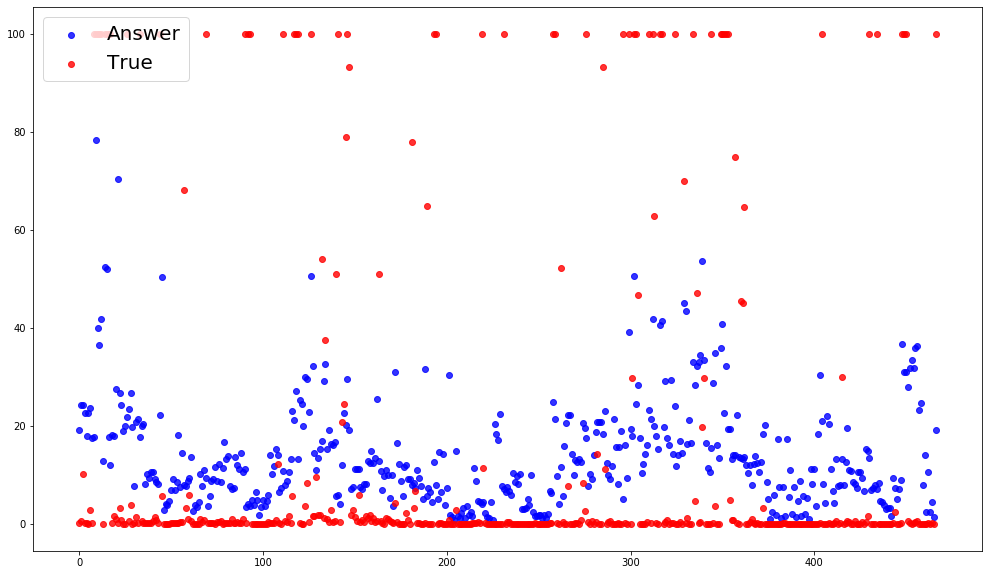

In [323]:
plot_answer(ans, y[:,0])

In [228]:
ans

[-11.608766972100653,
 -2.5384544721006534,
 -2.5384544721006534,
 -6.6361107221006534,
 -2.0306419721006534,
 -9.784548222100653,
 20.684201777899347,
 -24.983766972100653,
 11.172483027899347,
 -19.550173222100653,
 277078467719478.34,
 387649059867947.9,
 20.85926892778994,
 -4.265731072210059,
 33.98426892778994,
 86.10926892778994,
 91.67176892778994,
 -40.76573107221006,
 46.35926892778994,
 67.10926892778994,
 10.967685776805247,
 1195029525490941.2,
 37.24893577680525,
 36.57706077680525,
 1147832596426262.2,
 14.936435776805247,
 38.13956077680525,
 44.67081077680525,
 37.24893577680525,
 4.561435776805247,
 -1.0803722100656472,
 48.85712778993435,
 70.95087778993435,
 10.075877789934353,
 3.513377789934353,
 -7.111622210065647,
 -0.8616222100656472,
 12.325877789934353,
 16.669627789934353,
 13.107127789934353,
 4.313208205689278,
 16.75070820568928,
 -5.499291794310722,
 -2.4055417943107216,
 169228648083079.6,
 3.8600832056892784,
 -11.889916794310722,
 -1.1399167943107216,